In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt
import seaborn as sns

from time import time
from datetime import timedelta

from sklearn.model_selection import train_test_split,  KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

from sklearn.metrics import confusion_matrix, \
                  classification_report, accuracy_score,  precision_score, recall_score, f1_score

from IPython.core.interactiveshell import InteractiveShell

pd.set_option('display.precision', 3)

In [2]:
import warnings
warnings.filterwarnings('ignore')

np.random.seed(123) # for reproducibility

## Suport functions

In [3]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

In [ ]:
ILDS = pd.read_csv("train_features_ILDS.csv", delimiter=',')

ILDS.columns = ['Age', 'Female', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AR']
ILDS['target'] = pd.read_csv("train_labels_ILDS.csv", delimiter=',')

ILDS.shape

(462, 11)

In [6]:
ILDS.head

<bound method NDFrame.head of      Age  Female   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB    AR  target
0     48       0  4.5  2.3      282    13    74  7.0  2.4  0.52       0
1     39       0  1.9  0.9      180    42    62  7.4  4.3  1.38       0
2     23       0  1.0  0.3      212    41    80  6.2  3.1  1.00       0
3     42       1  0.7  0.2      152    35    81  6.2  3.2  1.06       0
4     52       1  0.6  0.1      194    10    12  6.9  3.3  0.90       1
..   ...     ...  ...  ...      ...   ...   ...  ...  ...   ...     ...
457   18       0  1.8  0.7      178    35    36  6.8  3.6  1.10       0
458   49       1  0.8  0.2      198    23    20  7.0  4.3  1.50       0
459   51       0  2.2  1.0      610    17    28  7.3  2.6  0.55       0
460   45       0  1.1  0.4       92    91   188  7.2  3.8  1.11       0
461    8       1  0.9  0.2      401    25    58  7.5  3.4  0.80       0

[462 rows x 11 columns]>

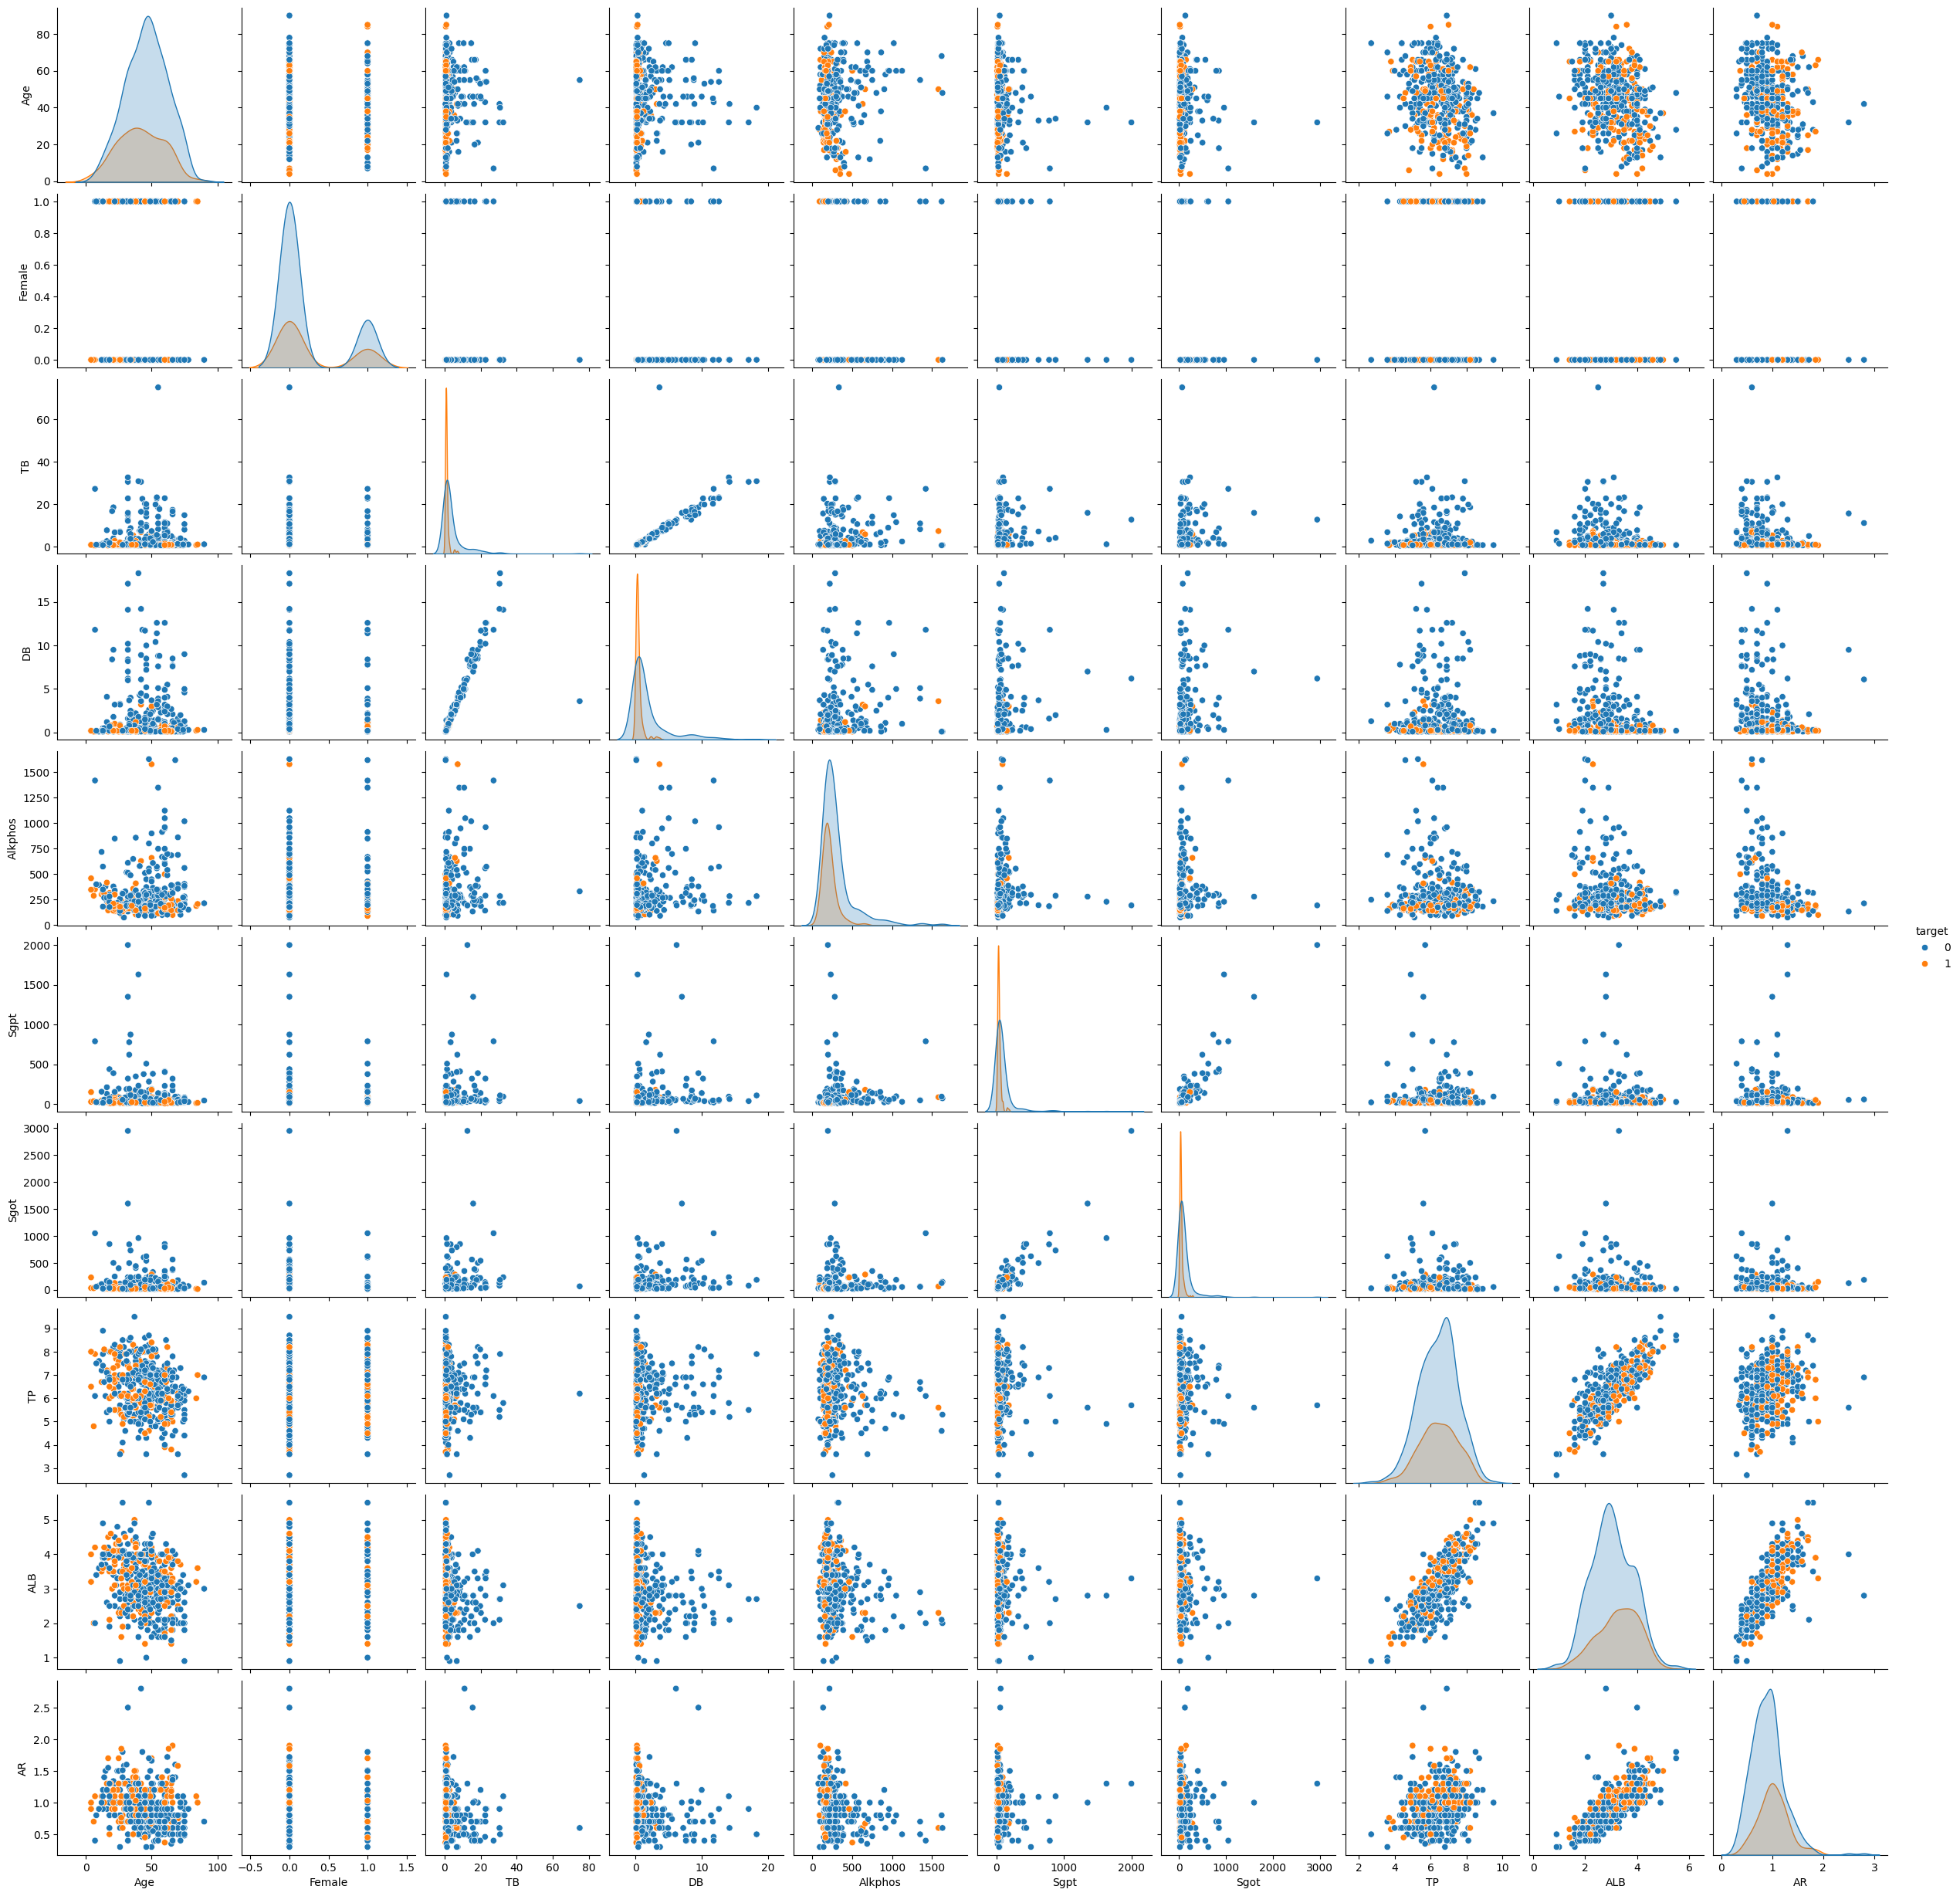

In [7]:
sns.pairplot(data=ILDS, hue='target')